# Basic Imports

In [ ]:
 import numpy as np
 import cv2   #converts image into arrays
 import os 
 import random 
 import matplotlib.pyplot as plt
 import pickle
 import tensorflow as tf
 tf.random.set_seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
import numpy as np
from glob import glob
import cv2   #converts image into arrays
import os 
import random 
import matplotlib.pyplot as plt
import pickle

In [ ]:
data = '/content/drive/MyDrive/Data/'
data

'/content/drive/MyDrive/Data/'

In [ ]:
categories=glob('/content/drive/MyDrive/Data/*')
categories


['/content/drive/MyDrive/Data/Bacterial leaf blight',
 '/content/drive/MyDrive/Data/Brown spot',
 '/content/drive/MyDrive/Data/Leaf smut']

In [ ]:
for category in categories:
  folder=os.path.join(data,category)
  for img in os.listdir(folder): #this list dir will list all the files that are present in the folder
       img_path=os.path.join(folder,img)
       print(img_path)
       break

/content/drive/MyDrive/Data/Bacterial leaf blight/DSC_0388.JPG
/content/drive/MyDrive/Data/Brown spot/DSC_0329.jpg
/content/drive/MyDrive/Data/Leaf smut/DSC_0503.jpg


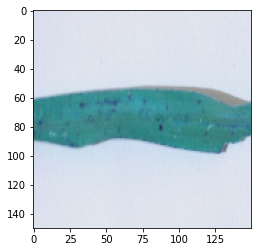

In [ ]:
IMG_SIZE=150
for category in categories:
  folder=os.path.join(data,category)
  for img in os.listdir(folder): #this list dir will list all the files that are present in the folder
       img_path=os.path.join(folder,img)
       img_arr=cv2.imread(img_path)    
       img_arr=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE)) ##cv2 converts image into array
       plt.imshow(img_arr)

In [ ]:
disease=[]
for category in categories:
  folder=os.path.join(data,category)
  label=categories.index(category)
  for img in os.listdir(folder): #this list dir will list all the files that are present in the folder
       img_path=os.path.join(folder,img)
       img_arr=cv2.imread(img_path)    #cv2 converts image into array
       img_arr=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
       disease.append([img_arr,label])

In [ ]:
label

2

In [ ]:
disease

[[array([[[227, 229, 239],
          [223, 227, 238],
          [223, 230, 239],
          ...,
          [224, 230, 237],
          [227, 233, 240],
          [227, 229, 240]],
  
         [[227, 232, 241],
          [223, 228, 237],
          [221, 227, 238],
          ...,
          [225, 231, 238],
          [224, 232, 239],
          [227, 229, 239]],
  
         [[226, 231, 240],
          [226, 231, 240],
          [222, 229, 238],
          ...,
          [227, 231, 239],
          [227, 233, 240],
          [227, 229, 239]],
  
         ...,
  
         [[220, 229, 238],
          [222, 229, 238],
          [220, 229, 239],
          ...,
          [223, 228, 237],
          [224, 227, 237],
          [224, 230, 241]],
  
         [[219, 228, 237],
          [220, 229, 238],
          [222, 230, 237],
          ...,
          [225, 230, 239],
          [223, 228, 237],
          [223, 228, 240]],
  
         [[221, 229, 238],
          [223, 230, 239],
          [220, 226, 237

In [ ]:
# Declaring X and y variables
X=[]
y=[]
for features,labels in disease:
  X.append(features)
  y.append(labels)

In [ ]:
# Converting to array
X=np.array(X)
y=np.array(y)

In [ ]:
# Checking the shape
X.shape

(119, 150, 150, 3)

In [ ]:
#X=X/255
#X

In [ ]:
IMAGE_SIZE = [150,150]
vgg = VGG16(input_shape = IMAGE_SIZE + [3],weights = 'imagenet', include_top = False)

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
# Initilizing the model
from keras.layers import Dense,Flatten
from keras.models import Model
x = Flatten()(vgg.output)
prediction = Dense(len(categories),activation = 'softmax')(x)
model = Model(inputs = vgg.input ,outputs = prediction)
# Model summary
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

# Model Architecture

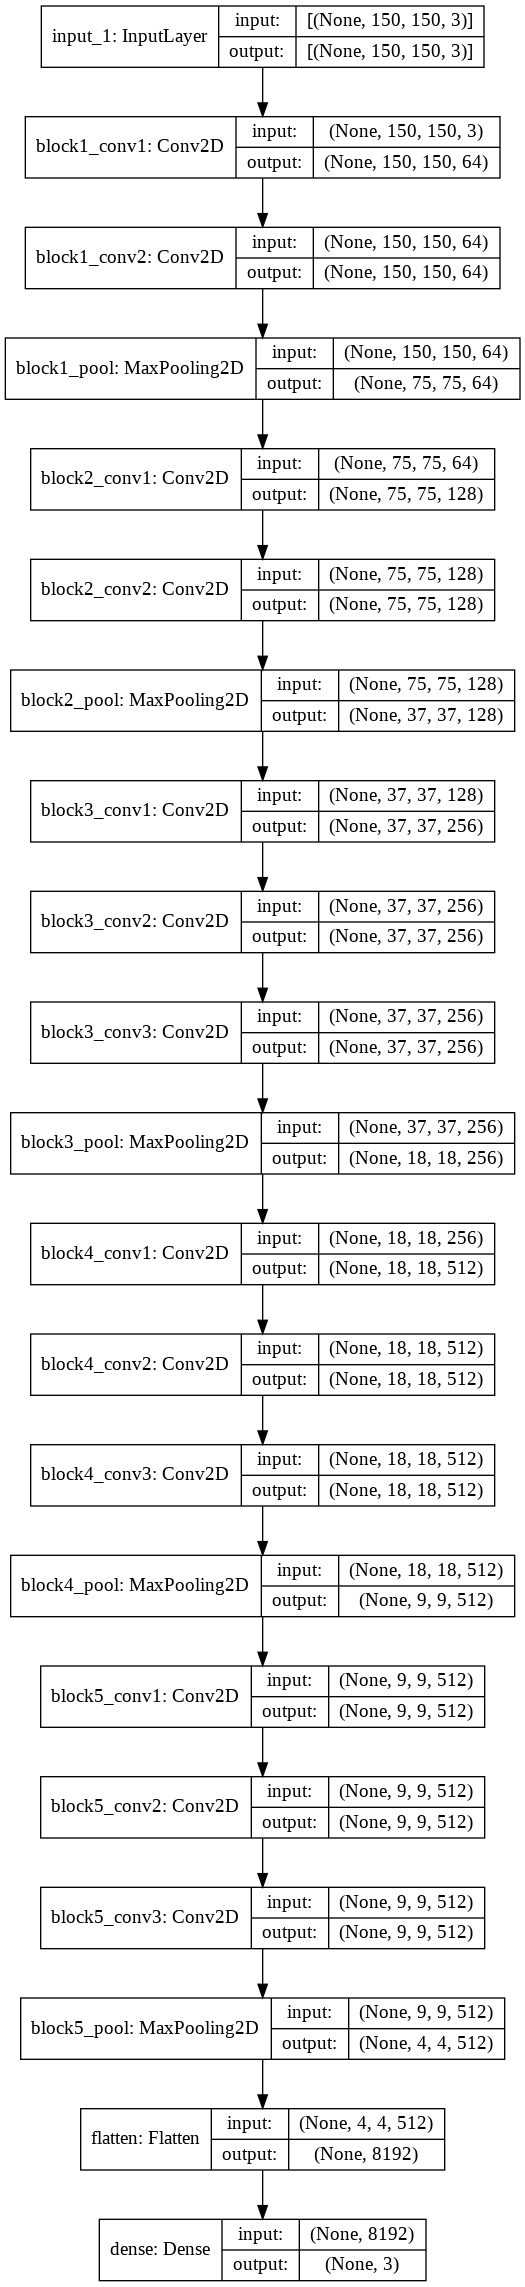

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
                            preprocessing_function = preprocess_input,
                            rescale = 1./255,
                             rotation_range = 35,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             fill_mode = 'nearest')
                             #validation_split=0.2)

In [ ]:
i = 0
for batch in datagen.flow(X,y,batch_size = 32):
                             
  i += 1
  if i > 30:
    break

In [ ]:
# Using Earlystopping method
import keras
callback= keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

# Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

# Converting into Categorical

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_categorical_train = to_categorical(y_train,3)

In [ ]:
y_categorical_train.shape

(95, 3)

In [ ]:
np.argmax(y_categorical_train[12])

1

In [ ]:
y_cat_test = to_categorical(y_test,3)

In [ ]:
# Assigning labels
class_labels = ['Bacterial leaf blight','Brown spot','Leaf smut']

In [ ]:
np.argmax(y_categorical_train[2])

0

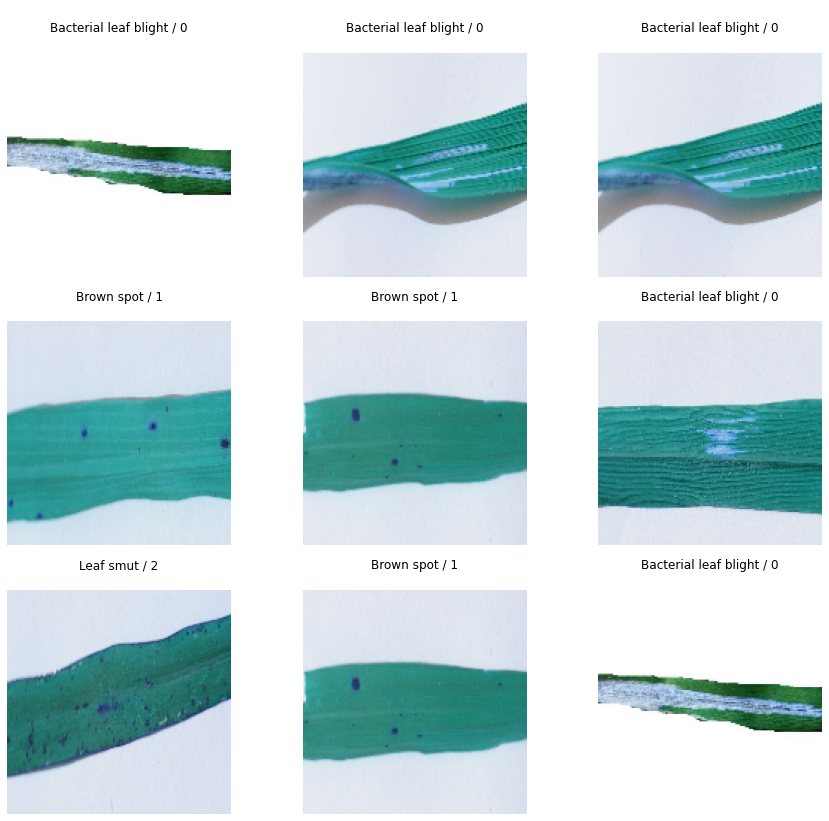

In [ ]:
plt.figure(figsize=(15,14))
j=1
for i in np.random.randint(0,8,9):
  plt.subplot(3,3,j);j+=1
  plt.imshow(X_train[i])
  plt.axis("off")
  plt.title('\n{} / {}\n'.format(class_labels[np.argmax(y_categorical_train[i])],np.argmax(y_categorical_train[i])))

# Model Training

In [ ]:
r=model.fit(X_train,y_categorical_train,epochs=150,batch_size=16,verbose=1,validation_data=(X_test,y_cat_test),callbacks=[callback])

Epoch 1/150
6/6 [==============================] - 37s 659ms/step - loss: 10.6329 - accuracy: 0.4119 - val_loss: 2.3578 - val_accuracy: 0.7917
Epoch 2/150
6/6 [==============================] - 0s 50ms/step - loss: 1.2834 - accuracy: 0.8290 - val_loss: 0.7434 - val_accuracy: 0.7917
Epoch 3/150
6/6 [==============================] - 0s 49ms/step - loss: 0.6052 - accuracy: 0.9387 - val_loss: 0.0816 - val_accuracy: 0.9583
Epoch 4/150
6/6 [==============================] - 0s 49ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0986 - val_accuracy: 0.9583
Epoch 5/150
6/6 [==============================] - 0s 48ms/step - loss: 0.0151 - accuracy: 0.9870 - val_loss: 0.0625 - val_accuracy: 0.9583
Epoch 6/150
6/6 [==============================] - 0s 49ms/step - loss: 2.5909e-06 - accuracy: 1.0000 - val_loss: 0.0574 - val_accuracy: 0.9583
Epoch 7/150
6/6 [==============================] - 0s 49ms/step - loss: 7.6904e-07 - accuracy: 1.0000 - val_loss: 0.0885 - val_accuracy: 0.9583
Epoch 8/1

# Ploting Train and Validation loss

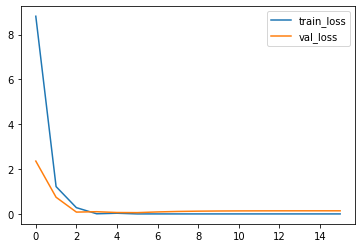

In [ ]:
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()


# Ploting Train and Validation accuracy

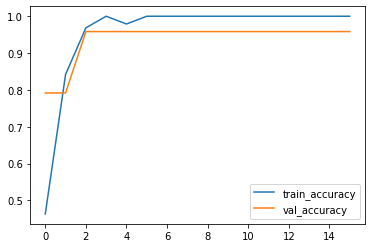

In [ ]:
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

# Evaluating Model

In [ ]:
model.evaluate(X_test,y_cat_test)

1/1 [==============================] - 2s 2s/step - loss: 0.1391 - accuracy: 0.9583


[0.13911624252796173, 0.9583333134651184]

In [ ]:
predictions = np.argmax(model.predict(X_test), axis=-1)


In [ ]:
from sklearn.metrics import classification_report
print("\033[1m\nClassification Report\n ")
print(classification_report(y_test,predictions))


Classification Report
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.88      0.93         8
           2       0.90      1.00      0.95         9

    accuracy                           0.96        24
   macro avg       0.97      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24



<Figure size 432x288 with 0 Axes>

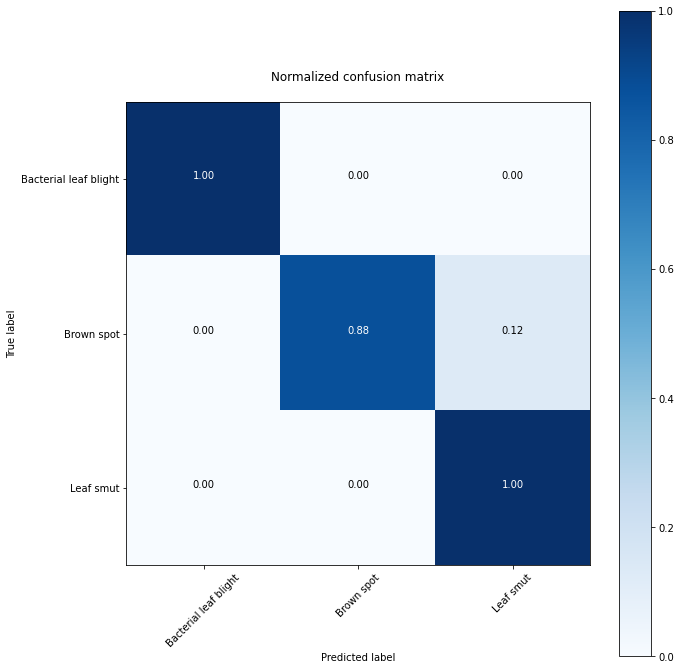

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels, title='Normalized confusion matrix\n')
plt.show()


In [ ]:
model.save('riceleaf_vgg16')

INFO:tensorflow:Assets written to: riceleaf_vgg16/assets
